In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


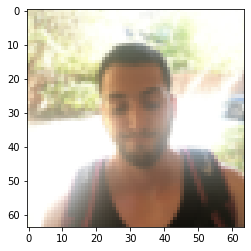

In [3]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [4]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            tf.keras.Input(shape=(64 , 64 ,3)),
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=3), # As import tensorflow.keras.layers as tfl
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(filters=32,kernel_size=7,strides=1),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1,activation='sigmoid')
        ])
    
    return model

In [5]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [7]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 9s 16ms/step - loss: 1.0149 - accuracy: 0.7350
Epoch 2/10
38/38 [==============================] - 0s 6ms/step - loss: 0.4030 - accuracy: 0.8450
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1186 - accuracy: 0.9583
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1767 - accuracy: 0.9200
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1303 - accuracy: 0.9567
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0703 - accuracy: 0.9800
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0882 - accuracy: 0.9700
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.2159 - accuracy: 0.9217
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0710 - accuracy: 0.9817
Epoch 10/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0512 - accuracy: 0.9850


In [9]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 14ms/step - loss: 0.1233 - accuracy: 0.9533


[0.12333989143371582, 0.95333331823349]

In [10]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


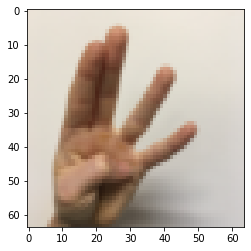

In [11]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [12]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [14]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(filters=8,kernel_size=4,strides=1,padding='SAME')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=8,strides=8,padding='SAME')(A1)

    Z2 = tfl.Conv2D(filters=16,kernel_size=2,strides=1,padding='SAME')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=4,strides=4,padding='SAME')(A2)

    F = tfl.Flatten()(P2)

    outputs = tfl.Dense(units=6,activation='softmax')(F)

    model = tf.keras.Model(inputs = input_img,outputs=outputs)

    return model

In [15]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 51ms/step - loss: 1.8129 - accuracy: 0.1731 - val_loss: 1.7921 - val_accuracy: 0.1500
Epoch 2/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7880 - accuracy: 0.1676 - val_loss: 1.7869 - val_accuracy: 0.2333
Epoch 3/100
17/17 [==============================] - 0s 21ms/step - loss: 1.7810 - accuracy: 0.2093 - val_loss: 1.7836 - val_accuracy: 0.1833
Epoch 4/100
17/17 [==============================] - 0s 23ms/step - loss: 1.7773 - accuracy: 0.2324 - val_loss: 1.7802 - val_accuracy: 0.1833
Epoch 5/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7726 - accuracy: 0.2694 - val_loss: 1.7763 - val_accuracy: 0.2000
Epoch 6/100
17/17 [==============================] - 0s 21ms/step - loss: 1.7676 - accuracy: 0.2639 - val_loss: 1.7714 - val_accuracy: 0.2083
Epoch 7/100
17/17 [==============================] - 1s 35ms/step - loss: 1.7621 - accuracy: 0.2926 - val_loss: 1.7656 - val_accuracy: 0.2583
Epoch 

In [17]:
history.history

{'loss': [1.812857985496521,
  1.7879753112792969,
  1.7809933423995972,
  1.777254343032837,
  1.772612452507019,
  1.767593502998352,
  1.7620850801467896,
  1.7550125122070312,
  1.7457029819488525,
  1.7330857515335083,
  1.7179235219955444,
  1.6991907358169556,
  1.6759759187698364,
  1.6472464799880981,
  1.6110228300094604,
  1.5714471340179443,
  1.5309923887252808,
  1.4879127740859985,
  1.4420928955078125,
  1.3970104455947876,
  1.3510991334915161,
  1.3056706190109253,
  1.2641054391860962,
  1.2230461835861206,
  1.1847193241119385,
  1.1486151218414307,
  1.114378809928894,
  1.0805549621582031,
  1.0478549003601074,
  1.0207386016845703,
  0.9938697218894958,
  0.9665619730949402,
  0.9431917667388916,
  0.9206047058105469,
  0.9000330567359924,
  0.8797584772109985,
  0.8610631227493286,
  0.8439156413078308,
  0.8265939354896545,
  0.8106240630149841,
  0.7956715226173401,
  0.7816933393478394,
  0.7683078050613403,
  0.7539024949073792,
  0.7421607375144958,
  0.730

c:\Python\Python395\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

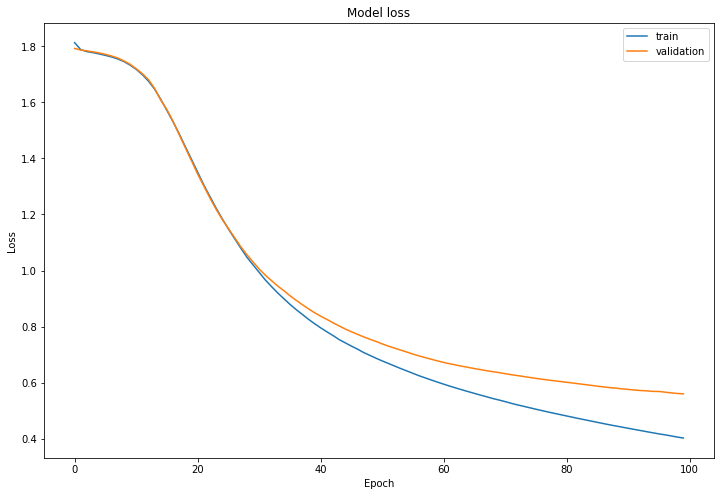

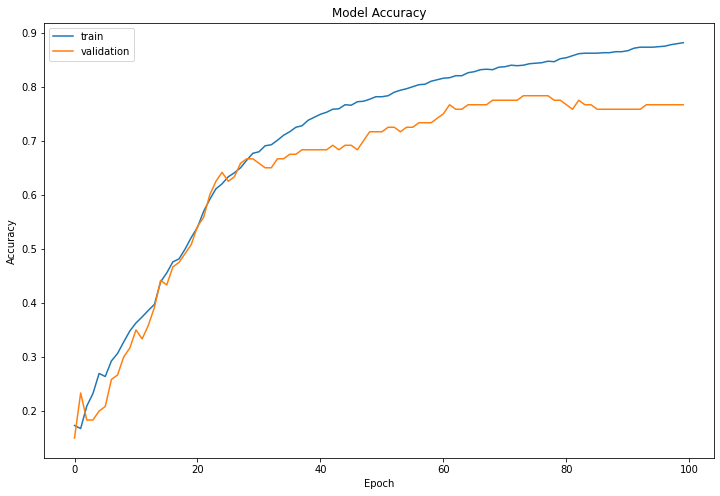

In [18]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')